![Clase aprendizaje no supervisado](https://raw.githubusercontent.com/MECA4605-Aprendizaje-no-supervisado/taller_3/main/figs/taller-meca-aprendizaje%20no%20supervisado_banner%201169%20x%20200%20px%20-05.png)

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos.
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [15]:
# Cargamos los paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [16]:
# Cargamos los datos de la base artist y user_artist
artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/artists.dat', sep='\t')
artist.head()

id               name                                         url  \
0   1       MALICE MIZER       http://www.last.fm/music/MALICE+MIZER   
1   2    Diary of Dreams    http://www.last.fm/music/Diary+of+Dreams   
2   3  Carpathian Forest  http://www.last.fm/music/Carpathian+Forest   
3   4       Moi dix Mois       http://www.last.fm/music/Moi+dix+Mois   
4   5        Bella Morte        http://www.last.fm/music/Bella+Morte   

                                          pictureURL  
0    http://userserve-ak.last.fm/serve/252/10808.jpg  
1  http://userserve-ak.last.fm/serve/252/3052066.jpg  
2  http://userserve-ak.last.fm/serve/252/40222717...  
3  http://userserve-ak.last.fm/serve/252/54697835...  
4  http://userserve-ak.last.fm/serve/252/14789013...

In [17]:
user_artist = pd.read_csv('https://raw.githubusercontent.com/sebastian23escobar/Aprendizaje_no_supervisado/refs/heads/main/Taller3/data/user_artists.dat', sep='\t')
user_artist.head()

userID  artistID  weight
0       2        51   13883
1       2        52   11690
2       2        53   11351
3       2        54   10300
4       2        55    8983

In [18]:
# Modificamos la base de datos para preservar solo las columnas id y name
artist = artist[['id', 'name']]

In [19]:
df = pd.merge(user_artist, artist, left_on='artistID', right_on='id', how='inner')
df = df[['userID', 'artistID',  'weight', "name"]]
df.columns = ['userID', 'artistID', 'nro_reproducciones', 'name'] 
df

userID  artistID  nro_reproducciones                 name
0           2        51               13883          Duran Duran
1           2        52               11690            Morcheeba
2           2        53               11351                  Air
3           2        54               10300         Hooverphonic
4           2        55                8983        Kylie Minogue
...       ...       ...                 ...                  ...
92829    2100     18726                 337            Nyktalgia
92830    2100     18727                 297     Atsakau  niekadA
92831    2100     18728                 281   Domantas Razauskas
92832    2100     18729                 280              Atalyja
92833    2100     18730                 263  Les Chants de Nihil

[92834 rows x 4 columns]

Se cargaron las bases de datos, se seleccionaron las columnas de interes y luego se realizó un merge para unir las bases de datos quedando un dataframe con los datos de los id de usuarios y el nro de reproducciones de los artistas.

### 2. Análisis preliminar.

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [20]:
nusuarios = df['userID'].nunique()
nartistas = df['artistID'].nunique()
print('Hay', nusuarios, 'usuarios y', nartistas, 'artistas')

Hay 1892 usuarios y 17632 artistas


Hay 1892 usuarios y 17632 artistas


#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [21]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartista = df['name'].value_counts()
distribucionartista = frecuenciasartista / frecuenciasartista.sum()

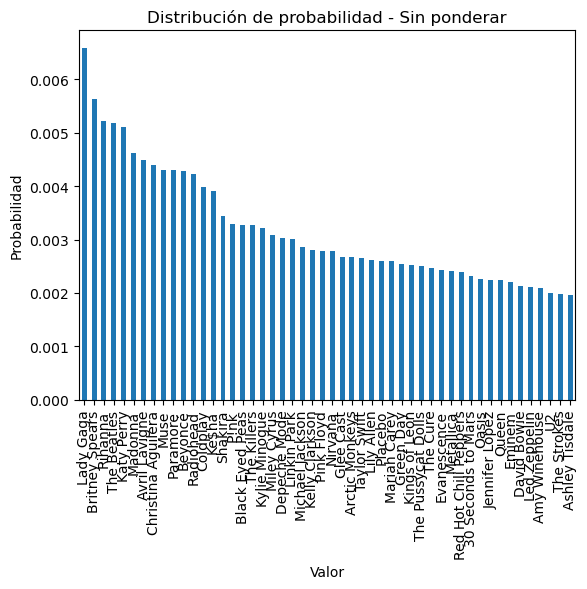

In [22]:
# Filtramos los primeros 50 artistas para poder visualizar mejor.
top_artistas = distribucionartista.nlargest(50)

top_artistas.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Sin ponderar')
plt.show()

### Ponderado por el numero de reproducciones

In [23]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
frecuenciasartistapond = df.groupby('name')['nro_reproducciones'].sum()
distribucionartistapond = frecuenciasartistapond / frecuenciasartistapond.sum()

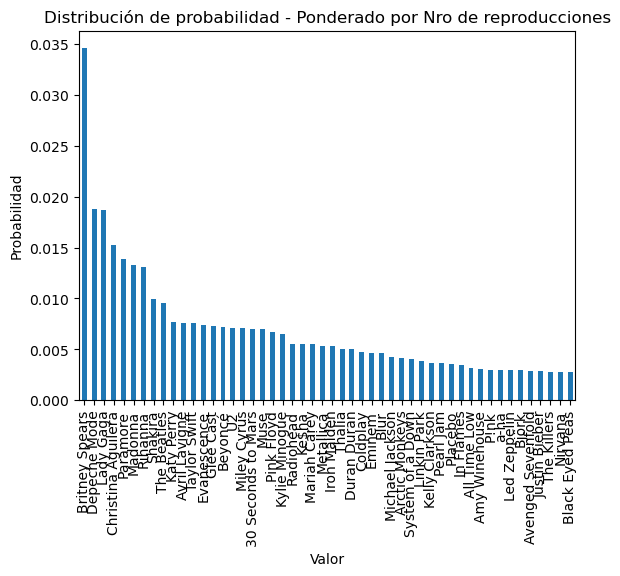

In [24]:
# Filtramos los primeros 50 artistas para poder visualizar mejor, con poderación.
top_artistapond = distribucionartistapond.nlargest(50)

top_artistapond.plot(kind='bar')
plt.ylabel('Probabilidad')
plt.xlabel('Valor')
plt.title('Distribución de probabilidad - Ponderado por Nro de reproducciones')
plt.show()

Se hizo el calculo de la probabilidad de consumo de los artistas, sin ponderación, es decir, solo teniendo en cuenta los usuarios que escucharon al artista al menos una vez, y con ponderación, es decir, teniendo en cuenta las veces que el artista fue reproducido por cada usuario. Como podemos apreciar en las gráficas de barras, ponderar si tienen un efecto sobre las probabilidades de consumo, por ejemplo, sin ponderar, Lady Gaga tiene una probabilidad de consumo superior al de Britney Spears (superior por poco, cerca de 0.001), sin embargo, teniendo en cuenta el nro de reproducciones, Britney Spear es la artista más escuchada aventajando notoriamente a Lady Gaga (superior por cerca de 0.016), de hecho, es Depeche Mode el segundo artista con mayor probabilidad de consumo.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\1268917364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user8['pondrel'] = user8['nro_reproducciones'] / user8['nro_reproducciones'].sum()


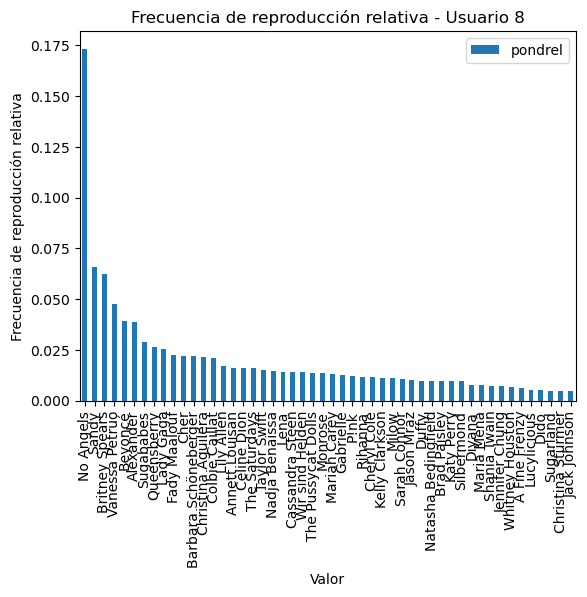

In [25]:
# Hacemos el cálculo de la probabilidad del consumo por artista sin ponderar, es decir, en función de si un usuario escucho un artista pero sin tener en cuenta la cantidad de reproducciones.
user8 = df[df['userID'] == 8]
user8['pondrel'] = user8['nro_reproducciones'] / user8['nro_reproducciones'].sum()
user8 = user8[['name', 'pondrel']]
user8 = user8.sort_values(by='pondrel', ascending=False)
user8 = user8.set_index('name')

user8.plot(kind='bar')
plt.ylabel('Frecuencia de reproducción relativa')
plt.xlabel('Valor')
plt.title('Frecuencia de reproducción relativa - Usuario 8')
plt.show()

In [26]:
user8.tail(10)

pondrel
name                       
Maria Mena         0.007635
Shania Twain       0.007084
Jennifer Chung     0.006974
Whitney Houston    0.006478
A Fine Frenzy      0.006312
Lucylicious        0.005099
Dido               0.004989
Sugarland          0.004906
Christina Stürmer  0.004879
Jack Johnson       0.004769

Como podemos apreciar en el gráfico de frecuencia anterior, los artistas más escuchados por el usuario 8 son artistas femeninos de música pop; sin embargo, en los menos escuchados tambien aparecen astistas pop pero mezclados con rock, country y folk.

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [27]:
# Contamos el número de usuarios que hay en la base
nusuarios = df['userID'].nunique()
nusuarios

1892

In [28]:
# Contamos la cantidad de usuarios que escuchan cada artista
fcol_ps = df.groupby('name')['nro_reproducciones'].count()
fcol_ps = fcol_ps / nusuarios
fcol_ps = fcol_ps.sort_values(ascending=False)
fcol_ps

name
Lady Gaga                             0.322939
Britney Spears                        0.275899
Rihanna                               0.255814
The Beatles                           0.253700
Katy Perry                            0.250000
                                        ...   
...And The Earth Swarmed With Them    0.000529
06 Children Of The Cross              0.000529
08001                                 0.000529
1-800-ZOMBIE                          0.000529
10-20 БЕЗ ВЫХОДНЫХ                    0.000529
Name: nro_reproducciones, Length: 17632, dtype: float64

In [29]:
# Ahora eliminamos del listado los artistas que escucha el usuario 8
fcol_ps = fcol_ps[~fcol_ps.index.isin(user8.index)]

# Listamos el top 10 de recomendados
fcol_ps.head(10)

name
The Beatles      0.253700
Madonna          0.226744
Avril Lavigne    0.220402
Muse             0.211416
Paramore         0.210888
Radiohead        0.207717
Coldplay         0.195032
Ke$ha            0.191332
Shakira          0.168605
The Killers      0.160677
Name: nro_reproducciones, dtype: float64

Como se observa en el código, se hizo el conteo de los usuarios que escuchan cada artista, y finalmente se dividió por el total de usuarios para hacer el promedio simple de los usuarios que escuchan cada artista, debido a que se desea recomendar nuevos artistas, de la lista se excluyeron los artistas ya escuchados por el usuario 8, como se puede apreciar en la tabla, los artistas recomendados son: The Beatles, Madonna, Avril Lavigne, Muse, Paramore, Radiohead, Coldplay, Ke$ha, Shakira y The killers. Notaremos que si bien es una recomenadación de los artistas más populares, no son todos justamente los más parecidos a los artistas escuchados habitualmente por el usuario 8 (hay artistas de Rock cuando el usuario prefiere pop).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [30]:
# Primero sumamos las nro_reproducciones de cada artista
fcol_pp = df.groupby('name')['nro_reproducciones'].sum()

In [31]:
# Sumamos el total de nro_reproducciones (el valor no el conteo) para toda la base
den_pond = fcol_pp.sum()
den_pond

np.int64(69183975)

In [32]:
# Hacemos el promedio ponderado de los artistas
fcol_pp = fcol_pp / den_pond
fcol_pp = fcol_pp.sort_values(ascending=False)
fcol_pp

name
Britney Spears        3.459096e-02
Depeche Mode          1.880938e-02
Lady Gaga             1.866598e-02
Christina Aguilera    1.529841e-02
Paramore              1.392590e-02
                          ...     
Ayn Rand              1.445421e-08
Don Julian            1.445421e-08
Tutu Jones            1.445421e-08
Doug Hammond          1.445421e-08
(Pre) Kingdom         1.445421e-08
Name: nro_reproducciones, Length: 17632, dtype: float64

In [33]:
# Ahora eliminamos del listado los artistas que escucha el usuario 8
fcol_pp = fcol_pp[~fcol_pp.index.isin(user8.index)]

# Listamos el top 10 de recomendados
fcol_pp.head(10)

name
Depeche Mode     0.018809
Paramore         0.013926
Madonna          0.013315
Shakira          0.009952
The Beatles      0.009570
Avril Lavigne    0.007601
Evanescence      0.007422
Glee Cast        0.007320
U2               0.007126
Miley Cyrus      0.007069
Name: nro_reproducciones, dtype: float64

Como se observa en el código, se hizo la suma del número de reproducciones que hicieron los usuarios de cada artista, y finalmente se dividió por el total de reproducciones hechas para todos los usuarios, esto para hacer el promedio ponderado de las reproducciones hechas a los artistas; debido a que se desea recomendar nuevos artistas, de la lista se excluyeron los artistas ya escuchados por el usuario 8, como se puede apreciar en la tabla, los artistas recomendados son: Depeche Mode, Paramore, Madonna, Shakira, The Beatles, Avril Lavigne, Evanescense, Glee Cast, U2 y Miley Cirus. Notemos que al igual que las recomendaciones con promedio simple, la recomenadación es de los artistas más populares y por lo tanto no son  justamente los más parecidos a los artistas escuchados habitualmente por el usuario 8 (hay artistas de Rock cuando el usuario prefiere pop). Igualmente es una recomendación de popularidad que de preferencia.

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [143]:
# Primero creamos la matriz de preferencias y reemplazamos los NA por 0
r_matrix = df.pivot_table(values='nro_reproducciones', index='userID', columns='name')
r_matrix_dummy = r_matrix.copy().fillna(0)

In [144]:
# Cargamos cosine_similarity para crear la matriz de distancias
from sklearn.metrics.pairwise import cosine_similarity

#Calculamos la similitud de coseno
cosine_sim = cosine_similarity(r_matrix_dummy, r_matrix_dummy)

# Transformamos la matriz de similitud en un DataFrame
cosine_sim = pd.DataFrame(cosine_sim, index=r_matrix.index, columns=r_matrix.index)
cosine_sim.round(4)

userID    2       3       4       5       6       7       8      9       10    \
userID                                                                          
2       1.0000  0.0000  0.1448  0.0287  0.0070  0.0302  0.0090  0.000  0.0000   
3       0.0000  1.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000  0.0000   
4       0.1448  0.0000  1.0000  0.0812  0.0066  0.0000  0.0000  0.000  0.0091   
5       0.0287  0.0000  0.0812  1.0000  0.0000  0.0000  0.0000  0.000  0.1691   
6       0.0070  0.0000  0.0066  0.0000  1.0000  0.0127  0.0189  0.000  0.0000   
...        ...     ...     ...     ...     ...     ...     ...    ...     ...   
2095    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000  0.0000   
2096    0.0010  0.0000  0.0451  0.2046  0.0000  0.0000  0.0000  0.000  0.0579   
2097    0.0821  0.0000  0.6591  0.1191  0.0000  0.0000  0.0000  0.000  0.1107   
2099    0.0000  0.0003  0.0000  0.0000  0.0000  0.0000  0.0000  0.006  0.0000   
2100    0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.000  0.0000   

userID    11    ...    2090    2091    2092    2093    2094    2095    2096  \
userID          ...                                                           
2       0.0213  ...  0.0000  0.0434  0.0000  0.0046  0.0016  0.0000  0.0010   
3       0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
4       0.0134  ...  0.0000  0.0000  0.0038  0.0062  0.0000  0.0000  0.0451   
5       0.0046  ...  0.0110  0.0000  0.2051  0.0000  0.0000  0.0000  0.2046   
6       0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
...        ...  ...     ...     ...     ...     ...     ...     ...     ...   
2095    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000   
2096    0.0018  ...  0.0067  0.0000  0.0563  0.0059  0.0000  0.0000  1.0000   
2097    0.0000  ...  0.0045  0.0227  0.2864  0.0000  0.0000  0.0000  0.0308   
2099    0.0000  ...  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000   
2100    0.0000  ...  0.0125  0.0000  0.0000  0.0000  0.0000  0.0679  0.0000   

userID    2097    2099    2100  
userID                          
2       0.0821  0.0000  0.0000  
3       0.0000  0.0003  0.0000  
4       0.6591  0.0000  0.0000  
5       0.1191  0.0000  0.0000  
6       0.0000  0.0000  0.0000  
...        ...     ...     ...  
2095    0.0000  0.0000  0.0679  
2096    0.0308  0.0000  0.0000  
2097    1.0000  0.0000  0.0000  
2099    0.0000  1.0000  0.0000  
2100    0.0000  0.0000  1.0000  

[1892 rows x 1892 columns]

In [ ]:
# Vemos el vector de similitudes para el usuario 8
sim_scores = cosine_sim[8]
sim_scores.head(10)

userID
2     0.008964
3     0.000000
4     0.000000
5     0.000000
6     0.018881
7     0.167416
8     1.000000
9     0.000000
10    0.000000
11    0.187304
Name: 8, dtype: float64

In [ ]:
# Definimos una función para calcular el promedio ponderado de los ratings para el usuario 8
# Esta función se creó dedidcada para el usuario 8, es decir, solo funciona para él

def cf_user_wmean(artista_in):

    # Primero verificamos si el artista está en la matriz
    if artista_in in r_matrix:

        #Nuestra función está dedicada al usuario 8, así que el vector sim_scores siempre corresponderá a las medidas de similitud de todos los usuarios con el usuario 8.
        sim_scores = cosine_sim[8]

        # Obtenemos los ratings no faltantes de la matriz bajo evaluación
        m_ratings = r_matrix[artista_in]

         # Obtenemos los índices de los artistas sin rating
        idx = m_ratings[m_ratings.isnull()].index

        # Nos quedamos con similitudes y ratings completos
        sim_scores = sim_scores.drop(idx)
        m_ratings = m_ratings.dropna()

        # Calculamos la media ponderada
        wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()

    else:
        # Si no tenemos ninguna información retornamos 0, significa que no hay similitud
        wmean_rating = 0

    return wmean_rating

In [ ]:
# Probamos la función - Con Tyler Adam nos da una media ponderada de 30614.0 según similitud del coseno
cf_user_wmean('Tyler Adam')

np.float64(30614.0)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

In [152]:
# Creamos un vector llamado "lista_coseno", donde almacenaremos todos los promedios ponderados por similitud de cosenos de todos los artistas para el usuario 8
lista_coseno = pd.DataFrame()
for name in r_matrix.columns:
    lista_coseno.loc[name, 1] = cf_user_wmean(name)

C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\2089882288.py:21: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\2089882288.py:21: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\2089882288.py:21: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\2089882288.py:21: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
C:\Users\ypalacios\AppData\Local\Temp\ipykernel_17968\2089882288.py:21: RuntimeWarning: invalid value encountered in scalar divide
  wmean_rating = np.dot(sim_scores, m_ratings)/ sim_scores.sum()
C:\Users\ypalacios\A

In [159]:
# Reemplazamos los NA por 0 (artistas no recomendados)
lista_coseno = lista_coseno.fillna(0)

# Ordenamos el df de mayor a menor para saber cuales son los artistas recomendados
lista_coseno = lista_coseno.sort_values(by= lista_coseno.columns[0], ascending= False)

# Quitamos los artistas que escucha el usuario 8 para no recomendar un artista repetido
lista_coseno = lista_coseno[~lista_coseno.index.isin(user8.index)]
lista_coseno.head(10).round(0)

1
Johnny Hallyday        32990.0
Tyler Adam             30614.0
Rytmus                 23462.0
The Devil Wears Prada  17098.0
Hadouken!              13331.0
The Classic Crime      12754.0
X-Ray Dog              12091.0
Kontrafakt             10726.0
Holdcut                10574.0
RoBERT                  9615.0

Para este punto creamos una matriz de prefencias donde los usuarios estaban en las filas y los artistas en las columnas, dejando el número de reproducciones como elementos dentro de la matriz; luego creamos el vector de similitudes usando la distacia del coseno, los usuarios con preferencias similares (es decir que escuchan mas artistas en común y con la misma intensidad o nro de reproducciones) tendrán valores más cercanos a 1.

Procedemos a crear una función que nos devuelva el promedio ponderado de cada artista para el usuario 8, para esto usamos como parámetro de entrada el nombre del artísta, la función devolverá el valor de cero si el artista no está en la matriz de preferencias, en caso de que si esté, llamará al vector de similitudes del usuario 8 y hará producto punto con los valores de nro_reproducciones de la matriz de prefencias para finalmente dividir en la suma de las preferencias de todos los usuarios respecto al usuario 8, es decir, hace un promedio ponderado del nro de reproducción según la simiitud del usuario 8 con los otros usuarios. Cabe mencionar que la función descarta los artistas sin calificación (sin nro_reproducciones).

Una vez creada la función, cálculamos los promedios ponderados para todos los artistas según la similitud de preferencias por distancia del coseno para el usuario 8, como podemos apreciar en la anterior tabla, los artistas recomendados son: "Johnny Hallyday", "Tyler Adam", "Rytmus", "The Devil Wears Prada", "Hadouken!", "The Classic Crime", "X-Ray Dog", "Kontrafaky", "HoldCut" y "RoBERT".

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hier-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).